# Rossmann Sales Prediction - Feature Engineering & Preprocessing

#### Nhiệm vụ chính
1. Tạo mới các feature từ dữ liệu có sẵn:
   - Year, Month, WeekOfYear, DayOfWeek,...
   - CompetitionOpen, Promo2Open, IsPromo2Month,...
2. Kiểm tra và xử lý multicollinearity (VIF).
3. Phát hiện và xử lý outliers (IQR method).
4. Biến đổi dữ liệu (log, sqrt,... để giảm skewness).
5. Mã hóa dữ liệu (Label Encoding / One-Hot Encoding).
6. Chuẩn hóa (StandardScaler) nếu cần.
7. Tạo file `processed_data.csv` để train model.

#### Kết quả bàn giao
- File đầu ra: `processed_data.csv`
- Notebook chứa toàn bộ bước xử lý và ghi chú.

In [125]:
import os, gc, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
sns.set_theme(style="whitegrid")

os.makedirs("image", exist_ok=True)

# Importing basic libraries for data processing
import math
from datetime import datetime

# importing missingno library which helps us to visualize the missing values
import missingno as msno

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [126]:
# Handling Missing Values & Missing Value Imputation
df = pd.read_csv("processed_data/cleaned_data.csv")

df['Date'] = pd.to_datetime(df['Date'])
# store = pd.read_csv("rossmann-store-sales/store.csv")
#df = df.merge(store, on="Store", how="left")

In [127]:
# Considering those rows where stores are open and sales are not zero. 
df = df[(df['Open']==1) & (df['Sales']!=0)]            

# Now since every store in our dataset are opened , we don't need 'Open' column and we will drop this column
df.drop(['Open'],axis=1,inplace=True)

In [128]:
df.isna().sum() 

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Vì chúng ta đã xử lý các giá trị null, nên hiện tại không còn bất kỳ giá trị thiếu/null/trùng lặp nào trong bộ dữ liệu nữa và bộ dữ liệu của chúng ta đã sẵn sàng để sử dụng.

Bạn đã sử dụng những kỹ thuật xử lý giá trị thiếu nào và tại sao bạn lại sử dụng những kỹ thuật đó?”

=> Nhóm đã kiểm tra các giá trị ngoại lai bằng cách vẽ biểu đồ boxplot, sau đó thay thế các giá trị null của các biến khác nhau bằng giá trị trung bình, trung vị, mode hoặc 0 tương ứng.

# 2. XỬ LÝ NGOẠI LAI

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64       

In [130]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


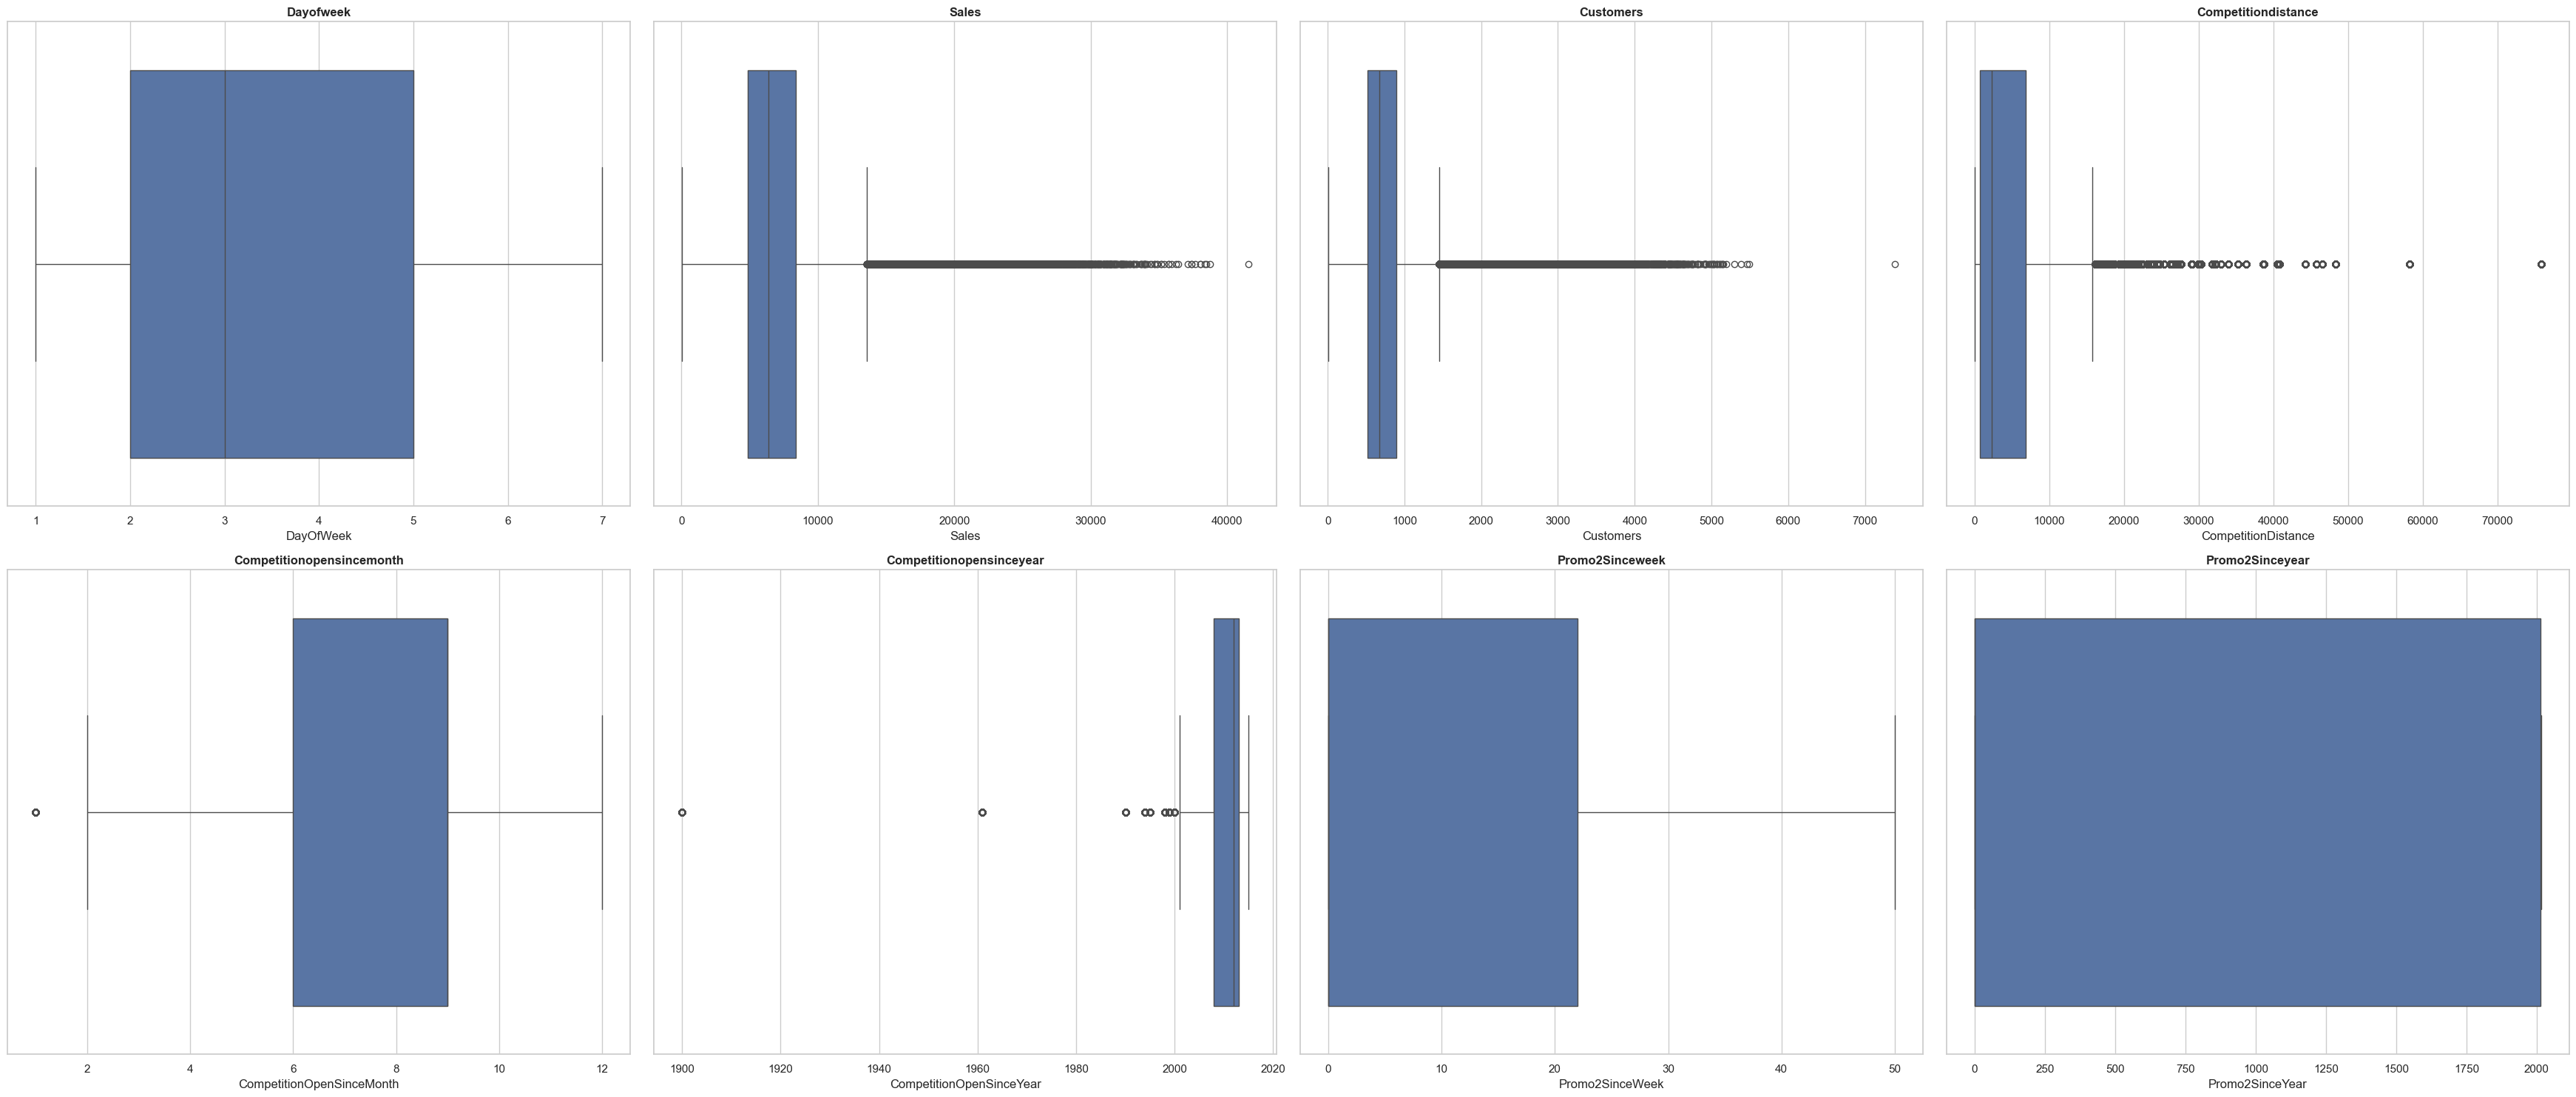

In [131]:
# Checking outliers with horizontal boxplots
plt.figure(figsize=(35, 15))

for n, column in enumerate(continous_value_feature):
    plt.subplot(2, 4, n+1)          # 2 rows, 4 columns (8 plots)
    sns.boxplot(x=df[column])       # <-- horizontal boxplot
    plt.title(column.title(), weight='bold')

plt.tight_layout()
plt.show()

- Từ các boxplot ở trên, chúng ta có thể thấy rõ rằng các đặc trưng 'Sales','Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth' và 'CompetitionOpenSinceYear' chứa khá nhiều giá trị ngoại lai, còn lại các đặc trưng khác thì ổn vì chúng mang tính chất phân loại (categorical).

Bây giờ chúng ta định nghĩa một đoạn code để phát hiện số lượng giá trị ngoại lai và tỷ lệ phần trăm giá trị ngoại lai có trong mỗi đặc trưng, để từ đó xử lý chúng một cách phù hợp.

In [132]:
#định nghĩa đoạn code để phát hiện ngoại lai và tính tỷ lệ phần trăm bằng phương pháp IQR.”
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [133]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:3.0, q3:5.0
Lower bound: -2.5, Upper bound: 9.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:4859.0, q2:6369.0, q3:8360.0
Lower bound: -392.5, Upper bound: 13611.5, IQR: 3501.0
Total number of outliers are: 30769
Total percentage of outlier is: 3.64 %


Customers :
q1:519.0, q2:676.0, q3:893.0
Lower bound: -42.0, Upper bound: 1454.0, IQR: 374.0
Total number of outliers are: 40853
Total percentage of outlier is: 4.84 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 83040
Total percentage of outlier is: 9.83 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 10297
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 22852

- Các biến liên tục cùng với tỷ lệ phần trăm giá trị ngoại lai:
    + "Sales" – 2,62%
    + "Customers" – 3,75%
    + "CompetitionDistance" – 9,75%
    + "CompetitionOpenSinceMonth" – 1,22%
    + "CompetitionOpenSinceYear" – 2,71%

Bây giờ nhóm sẽ nghĩa một hàm để xử lý giá trị ngoại lai bằng kỹ thuật IQR và chặn (cap) các giá trị ngoại lai trong khoảng phân vị 25–75.”

In [134]:
#Định nghĩa hàm xử lý giá trị ngoại lai bằng kỹ thuật IQR
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [135]:
# Truyền lần lượt tất cả các đặc trưng trong danh sách continous_value_feature vào hàm đã định nghĩa ở trên để xử lý ngoại lai
for feature in continous_value_feature:
  df[feature]= treat_outliers_iqr(df[feature])

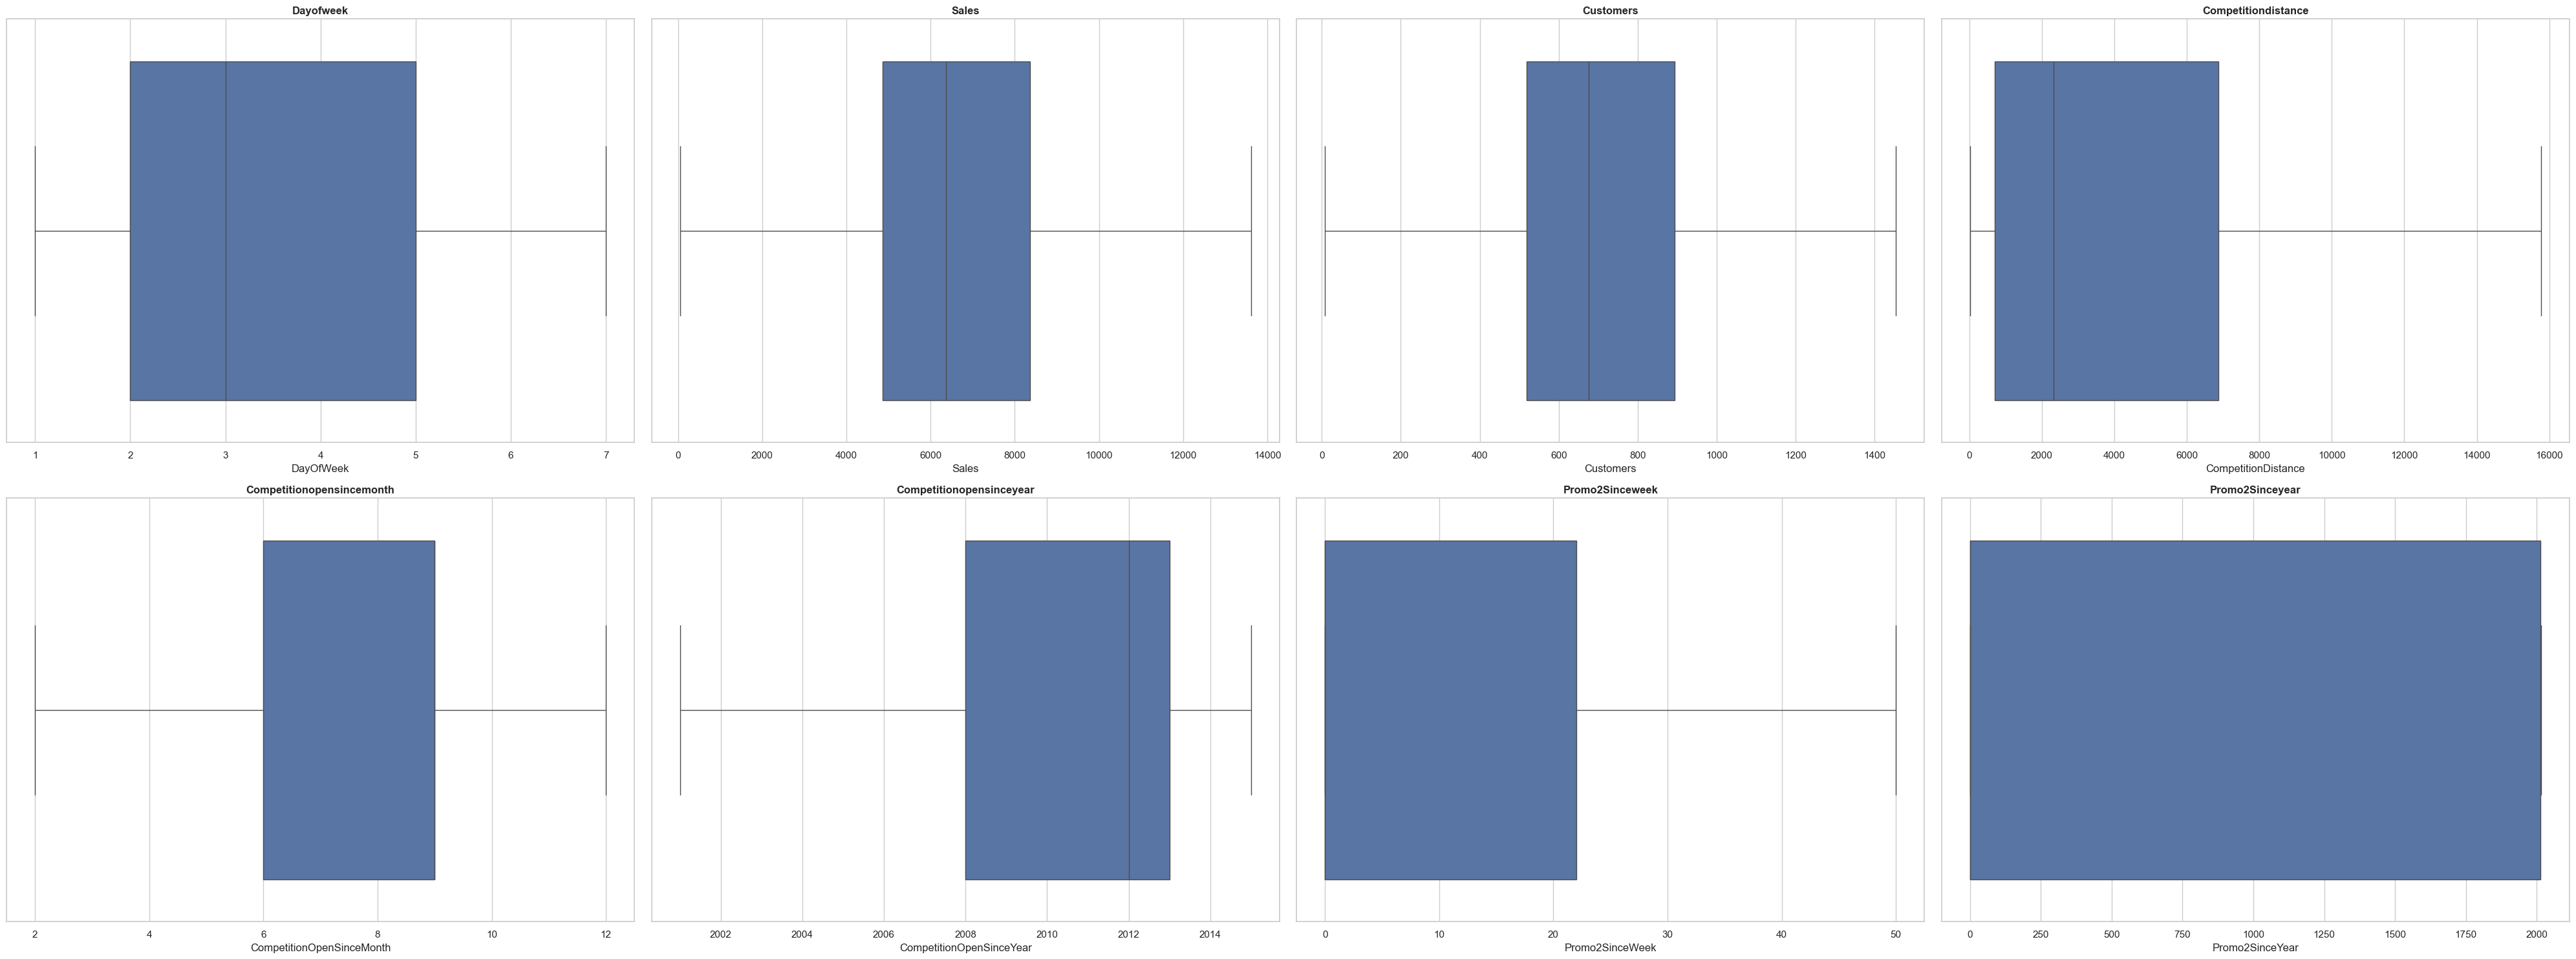

In [136]:
# Vẽ lại các biểu đồ boxplot và kiểm tra lại tỷ lệ giá trị ngoại lai còn tồn tại (nếu có) trong danh sách continous_value_feature.”
plt.figure(figsize=(40, 15))

for n, column in enumerate(continous_value_feature):
    plt.subplot(2, 4, n+1)     # 2 hàng x 4 cột
    sns.boxplot(x=df[column])  # <-- nằm ngang
    plt.title(column.title(), weight='bold')

plt.tight_layout()
plt.show()

In [137]:
# Kiểm tra lại tổng số lượng giá trị ngoại lai và tỷ lệ phần trăm của chúng trong bộ dữ liệu.”
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:3.0, q3:5.0
Lower bound: -2.5, Upper bound: 9.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:4859.0, q2:6369.0, q3:8360.0
Lower bound: -392.5, Upper bound: 13611.5, IQR: 3501.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:519.0, q2:676.0, q3:893.0
Lower bound: -42.0, Upper bound: 1454.0, IQR: 374.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of out

# 3. MÃ HÓA DỮ LIỆU PHÂN LOẠI 

In [138]:
# kiểm tra các đặc trưng có kiểu dữ liệu là objec
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64       

- Chúng ta có các cột "StateHoliday", ‘StoreType’, ‘Assortment’, ‘PromoInterval’ đang có kiểu dữ liệu object.
- Để đưa chúng vào thuật toán Machine Learning, chúng ta cần sử dụng một kỹ thuật mã hóa (encoding) để chuyển kiểu dữ liệu của các cột này thành integer.”

In [139]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [140]:
# kiểm tra số lượng giá trị duy nhất của các cột kiểu object, điều này rất cần thiết để xác định loại kỹ thuật mã hóa sẽ sử dụng cho từng cột”
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 '0' 'a' 'b' 'c']
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: ['0' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




- Từ kết quả phía trên, chúng ta có thể thấy đặc trưng ‘StateHoliday’ chứa cả giá trị '0' dạng chuỗi và 0 dạng số nguyên trong nhiều quan sát. Vì vậy, hãy chuyển '0' (string) thành 0 (integer).”

In [141]:
# thay thế '0' thành 0 và gán a = b = c = 1 cho đơn giản, vì chúng đều biểu thị rằng có ngày nghỉ (holiday)”
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [142]:
# kiểm tra lại số lượng giá trị duy nhất của các cột kiểu object, điều này rất cần thiết để xác định loại mã hóa sẽ sử dụng cho từng cột”
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: ['0' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




- Vì chúng ta có nhiều kỹ thuật mã hóa khác nhau, nhưng hai kỹ thuật chính là:
    + Ordinal encoding: dùng khi các đặc trưng mang tính thứ bậc và có mức độ hoặc thứ hạng giữa chúng.
    + Nominal encoding: dùng khi các đặc trưng có trọng số ngang nhau và mang tính phân loại (không có thứ tự).
- Vì tất cả các cột dữ liệu phân loại của chúng ta đều mang tính nominal (không có thứ tự hay thứ hạng), nên trong trường hợp này chúng ta sẽ sử dụng One-Hot Encoding (một dạng của Nominal encoding).

In [143]:
# Tạo một bản sao dataframe để tránh sai sót với dataframe gốc khi thực hiện mã hóa
df_new=df.copy() 

- Chúng ta có thể sử dụng đoạn code trên để tạo các biến giả nhị phân bằng One-Hot Encoding cho từng đặc trưng, nhưng điều này sẽ dẫn đến vấn đề ‘đa cộng tuyến’ (multicollinearity) hoặc ‘bẫy biến giả’ (dummy variable trap), vì thông tin mà một biến cung cấp có thể được giải thích lại bởi các biến khác, và điều này làm cho chỉ số VIF tăng cao. Do đó, tốt hơn là chúng ta nên loại bỏ biến dư thừa (một category trong số các category) ngay tại bước này.

- Chúng ta có thể thực hiện điều đó một cách dễ dàng bằng cách truyền tham số drop_first = True vào hàm get_dummies mà không cần phải làm thủ công. 

In [144]:
#Mã hóa các cột phân loại của bạn bằng cách loại bỏ category đầu tiên
df_new= pd.get_dummies(df, dtype=int, drop_first=True)

In [145]:

pd.set_option('display.max_columns', None)

In [146]:
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [147]:
# Kiểm tra lại kiểu dữ liệu (dtype)”
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844338 non-null  int64         
 1   DayOfWeek                       844338 non-null  int64         
 2   Date                            844338 non-null  datetime64[ns]
 3   Sales                           844338 non-null  int64         
 4   Customers                       844338 non-null  int64         
 5   Promo                           844338 non-null  int64         
 6   StateHoliday                    844338 non-null  int64         
 7   SchoolHoliday                   844338 non-null  int64         
 8   CompetitionDistance             844338 non-null  int64         
 9   CompetitionOpenSinceMonth       844338 non-null  int64         
 10  CompetitionOpenSinceYear        844338 non-null  int64      

- LÝ DO TẠI SAO SỬ DỤNG KỸ THUẬT MÃ HÓA DỮ LIỆU PHÂN LOẠI ?
    + a. Nhóm đã sử dụng kỹ thuật one-hot encoding để chuyển các đặc trưng dạng object sang dạng int bằng cách tạo các biến giả (dummy). Điều này giúp dữ liệu tương thích để đưa vào các thuật toán Machine Learning trong các bước tiếp theo.
    + b. Vì tất cả các đặc trưng phân loại của chúng tôi chỉ có khoảng 3 đến 4 giá trị khác nhau và không có thứ tự (orderless), nên việc sử dụng kỹ thuật Nominal Encoding là phù hợp hơn so với Ordinal Encoding. 

# 4.XỬ LÝ VÀ CHỌN LOẠI ĐẶC TRƯNG

- 1 Xử lý đặc trưng

- Xử lý các đặc trưng để giảm mức độ tương quan giữa chúng và tạo ra đặc trưng mới

In [148]:
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [149]:
# Trích xuất ngày, tháng và năm từ đặc trưng Date
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"] = df_new["Date"].dt.isocalendar().week

In [150]:
#Kiểm tra 5 quan sát đầu tiên
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Year  Week  
0                               0   31      7  2015    31  
1                               0   31      7  2015    31  
2                               0   31      7  2015    31  
3                               0   31      7  2015    31  
4                               0   31      7  2015    31

In [151]:
# tạo ra 2 đặc trưng mới:
#   + ‘CompetitionDuration’ → khoảng thời gian hai cửa hàng cạnh tranh
#   + ‘PromoDuration’ → khoảng thời gian cửa hàng tham gia chương trình khuyến mãi
# Giá trị cuối cùng được tính theo đơn vị tháng.

# CompetitionDuration (tính theo tháng, nếu âm thì cho về 0)
df_new["CompetitionDuration"] = (
    (df_new["Year"] - df_new["CompetitionOpenSinceYear"]) * 12
    + (df_new["Month"] - df_new["CompetitionOpenSinceMonth"])
)
df_new["CompetitionDuration"] = (
    df_new["CompetitionDuration"]
      .map(lambda x: 0 if x < 0 else int(x))
      .fillna(0)
)

# PromoDuration 
df_new["PromoDuration"] = (
    (df_new["Year"] - df_new["Promo2SinceYear"]) * 12
    + (df_new["Week"] - df_new["Promo2SinceWeek"]) * 7 / 30.5
)

df_new["PromoDuration"] = (
    df_new["PromoDuration"]
      .map(lambda x: 0 if x < 0 else int(x))
      .fillna(0)
      * df_new["Promo2"]   # dùng df_new cho rõ ràng
)


In [152]:

df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Year  Week  \
0                               0   31      7  2015    31   
1                               0   31      7  2015    31   
2                               0   31      7  2015    31   
3                               0   31      7  2015    31   
4                               0   31      7  2015    31   

   CompetitionDuration  PromoDuration  
0                   82              0  
1                   92             64  
2                  103             51  
3                   70              0  
4                    3              0

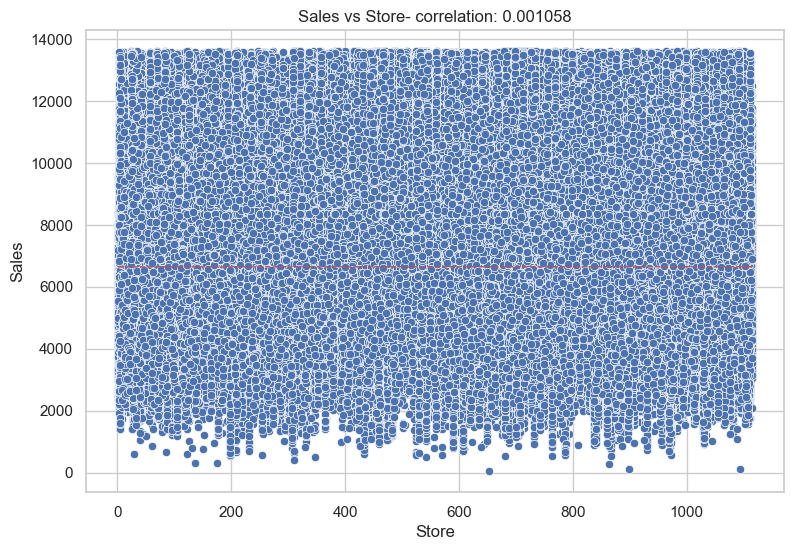

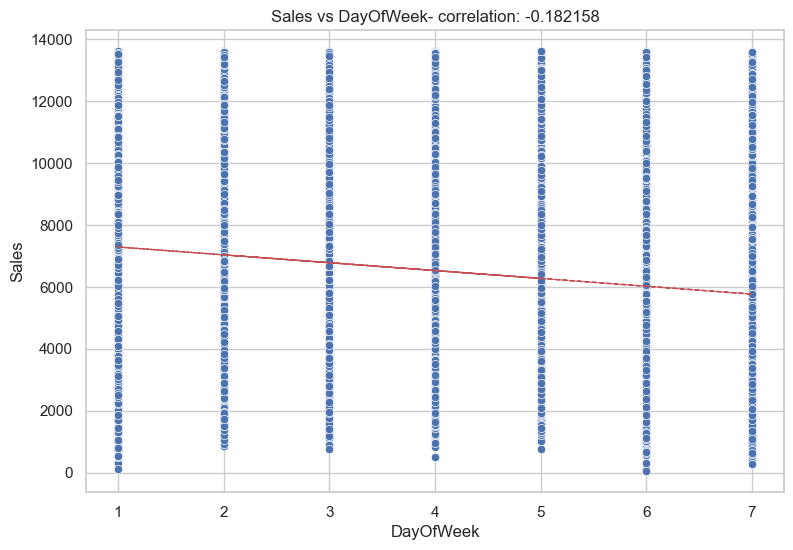

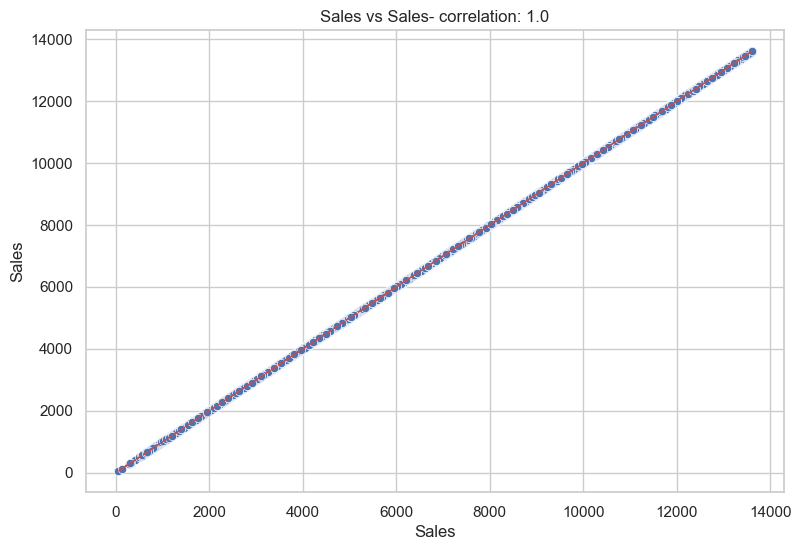

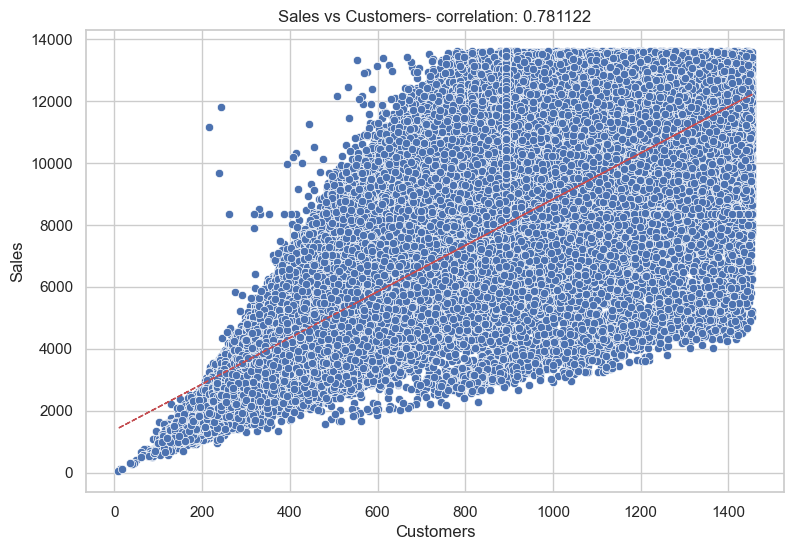

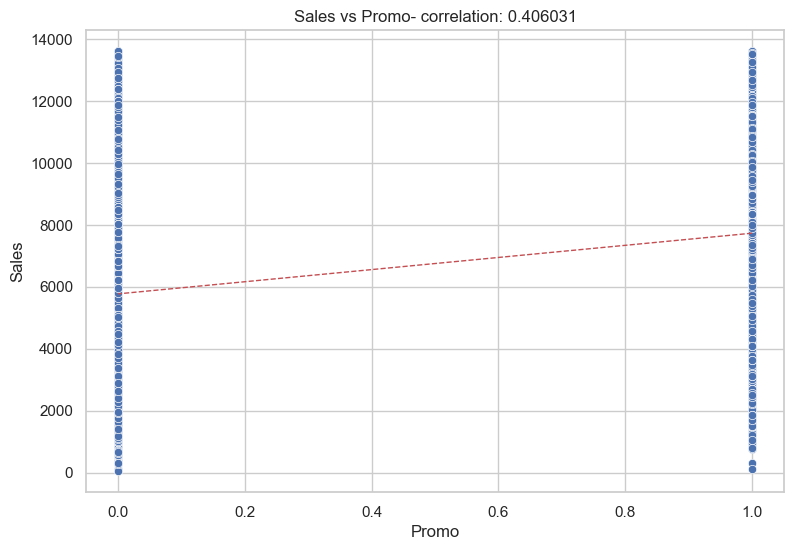

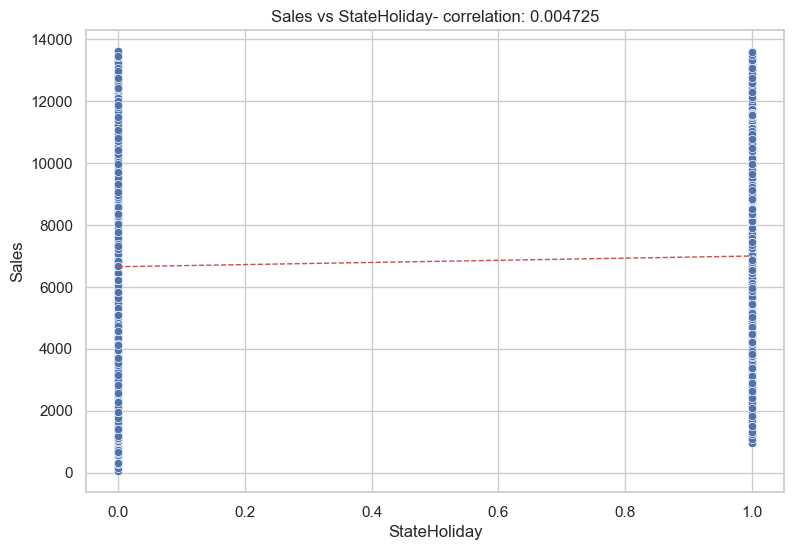

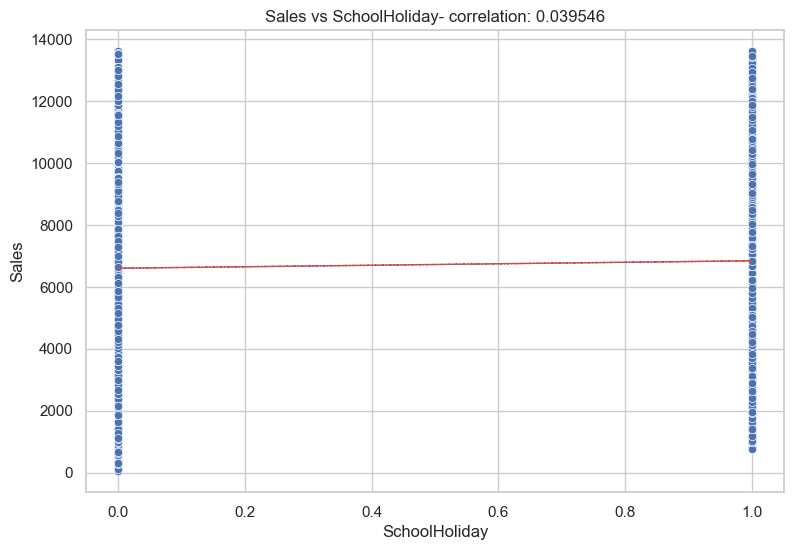

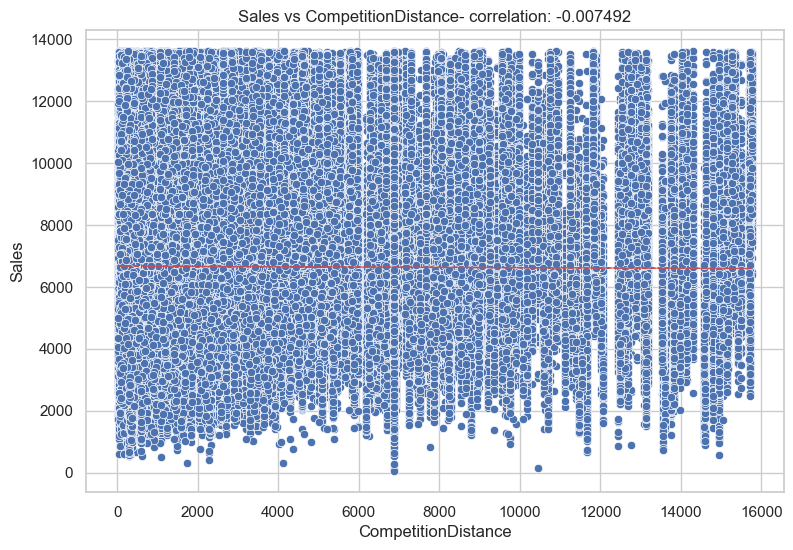

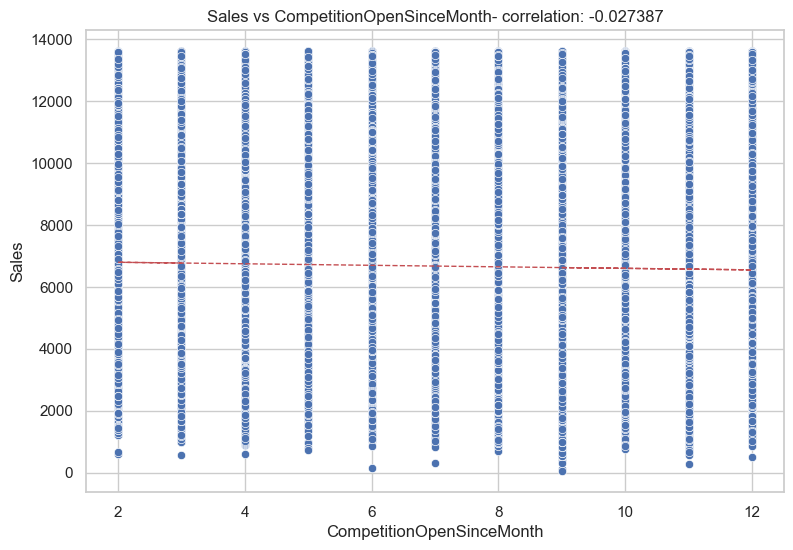

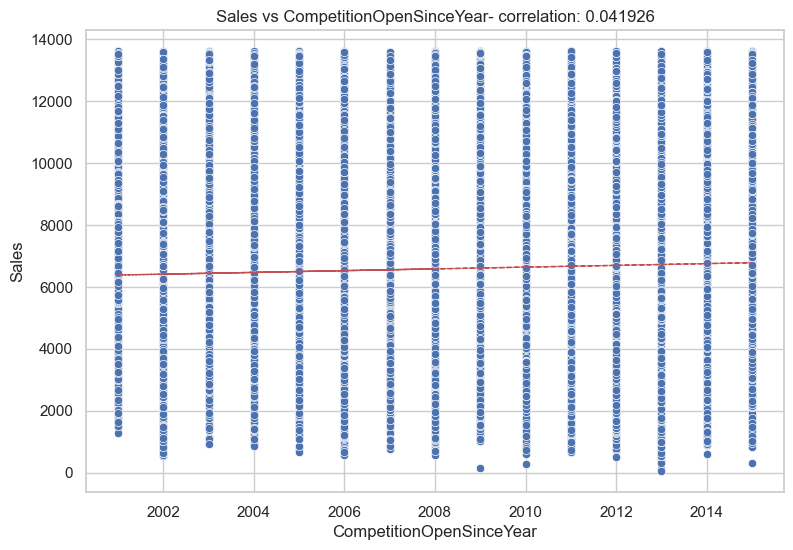

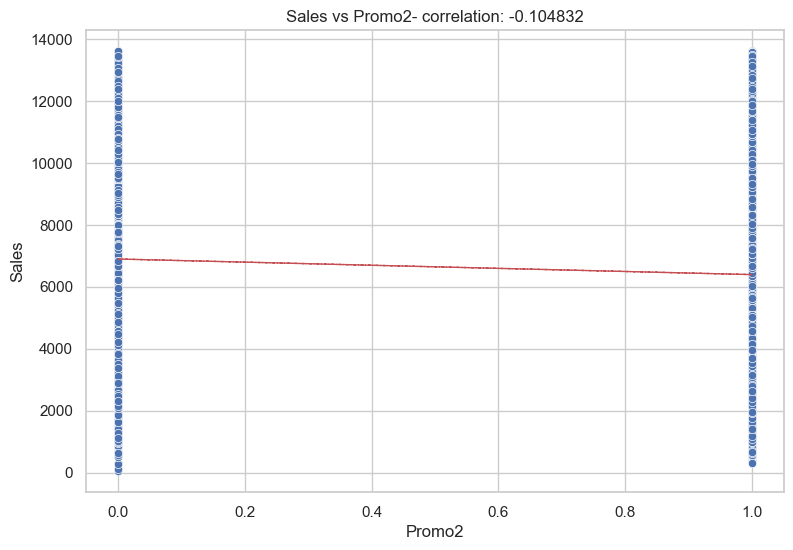

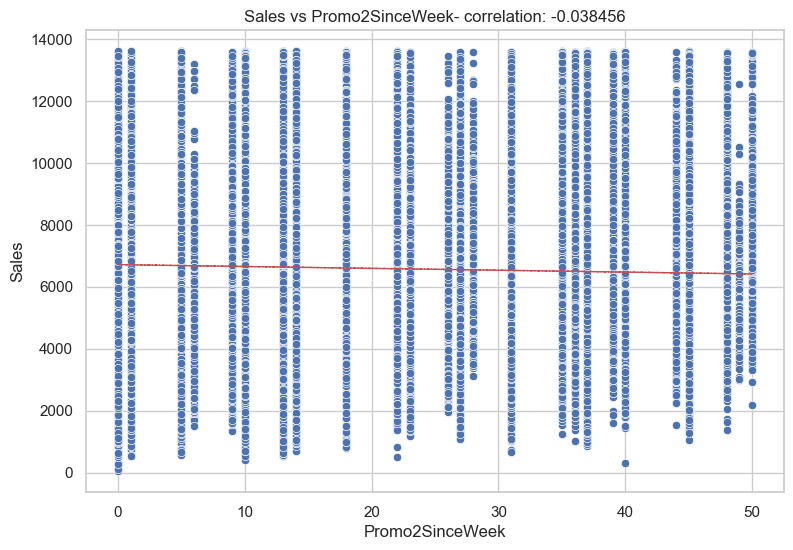

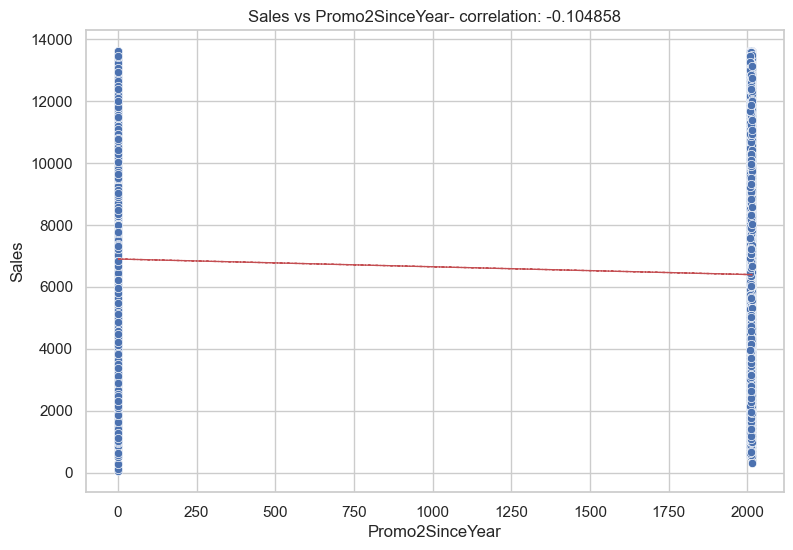

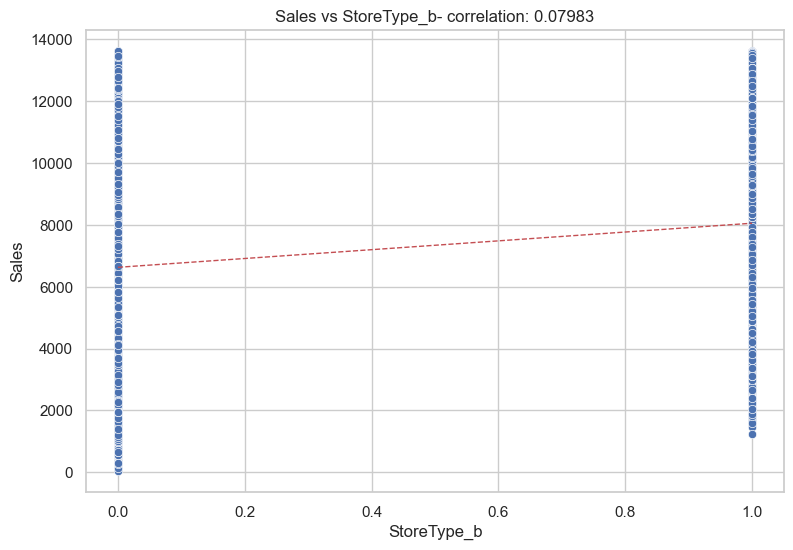

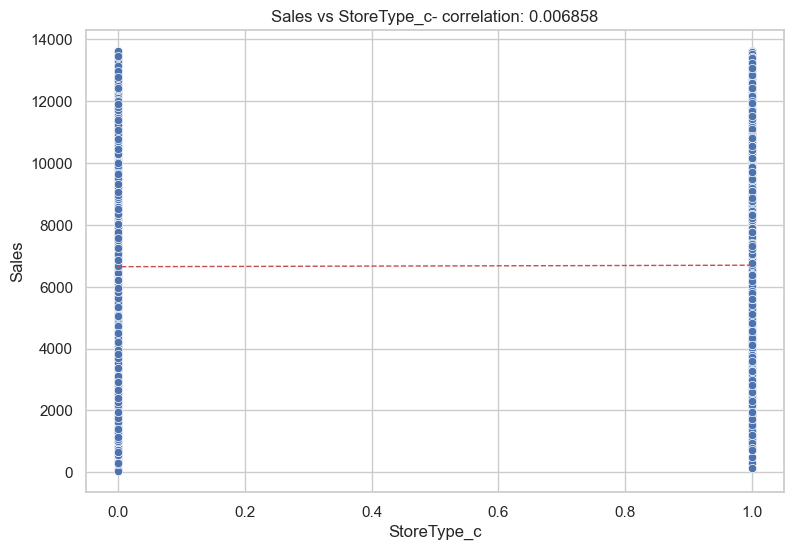

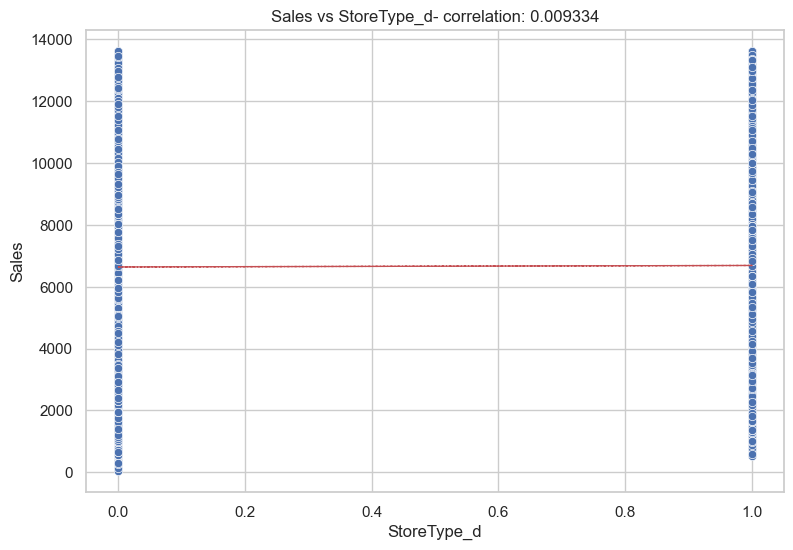

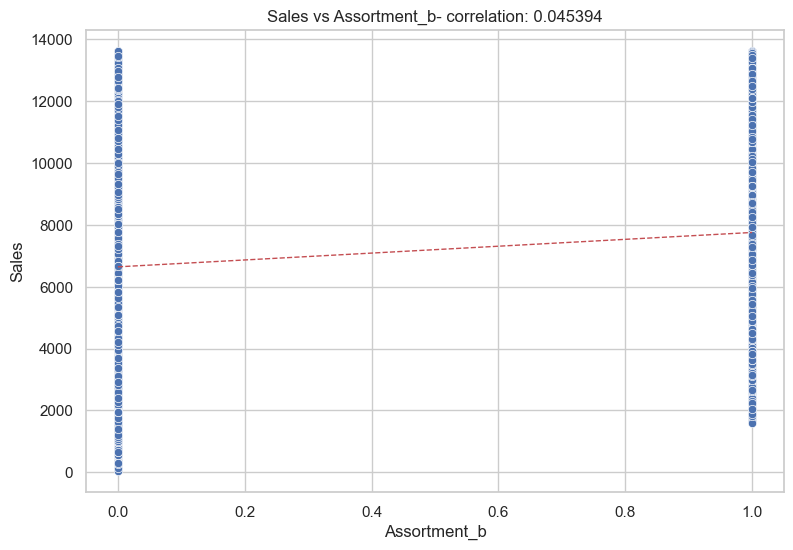

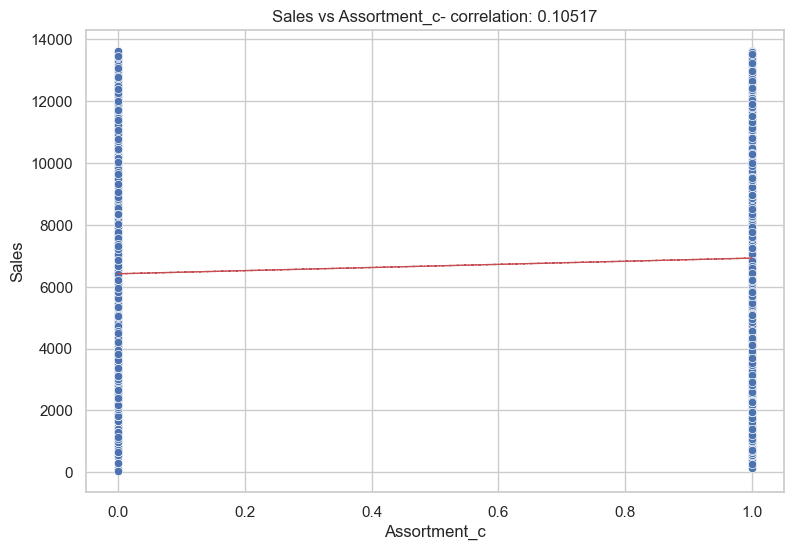

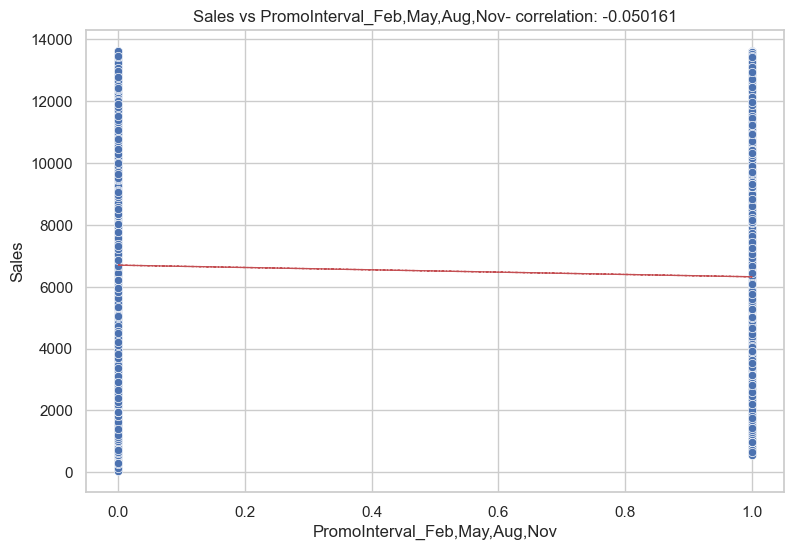

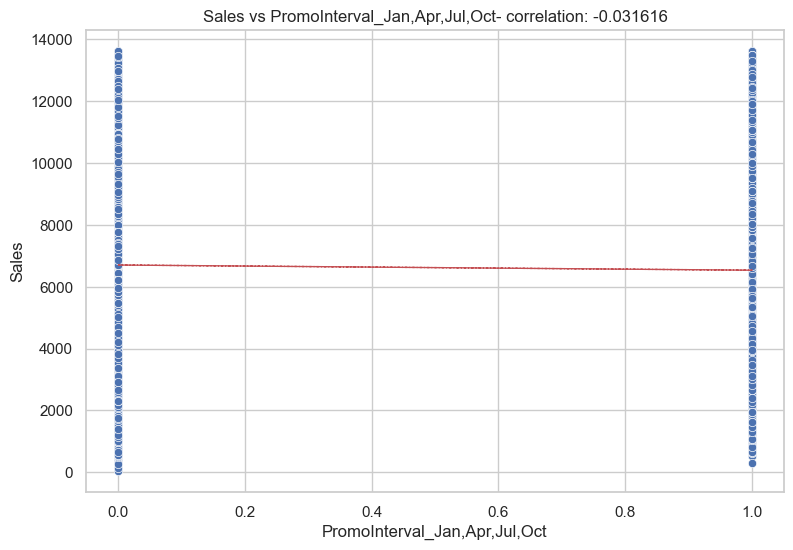

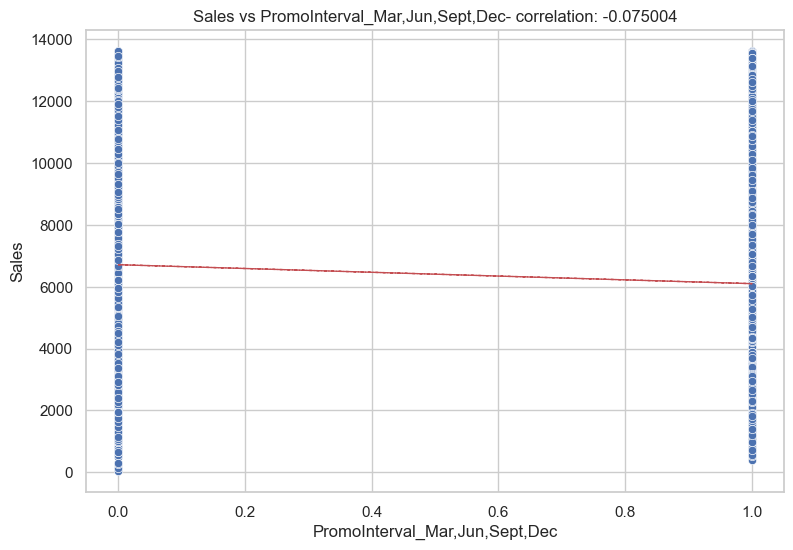

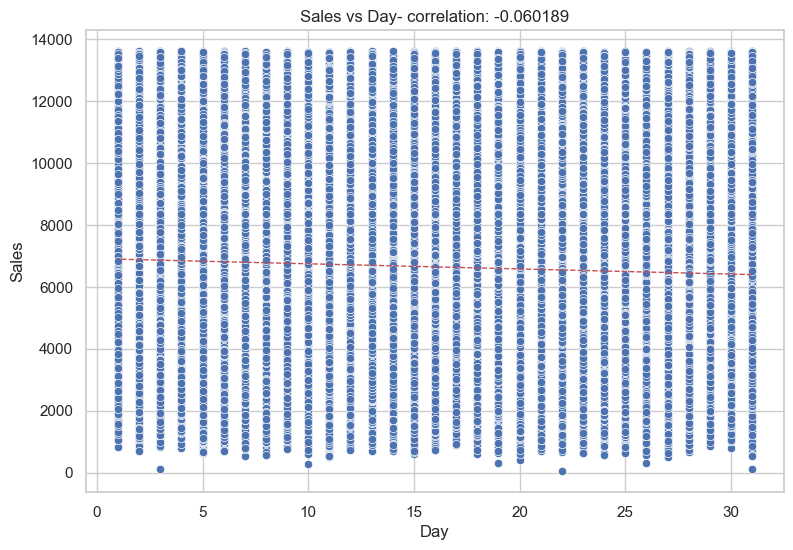

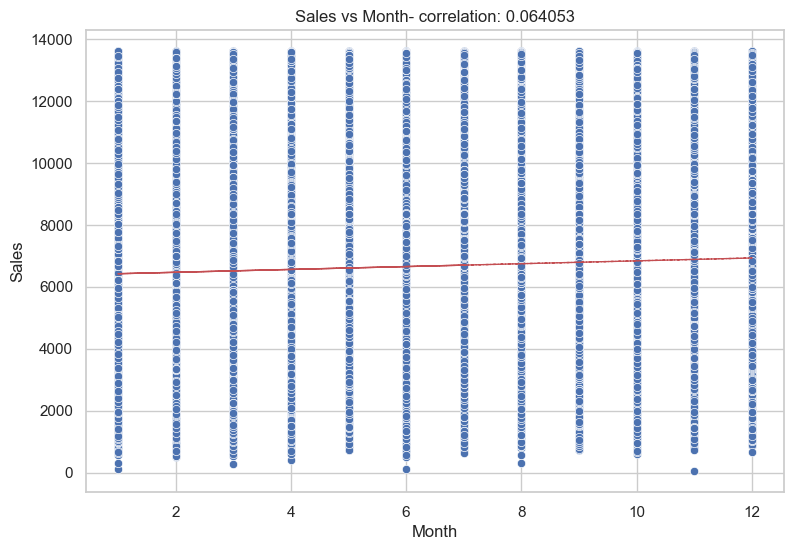

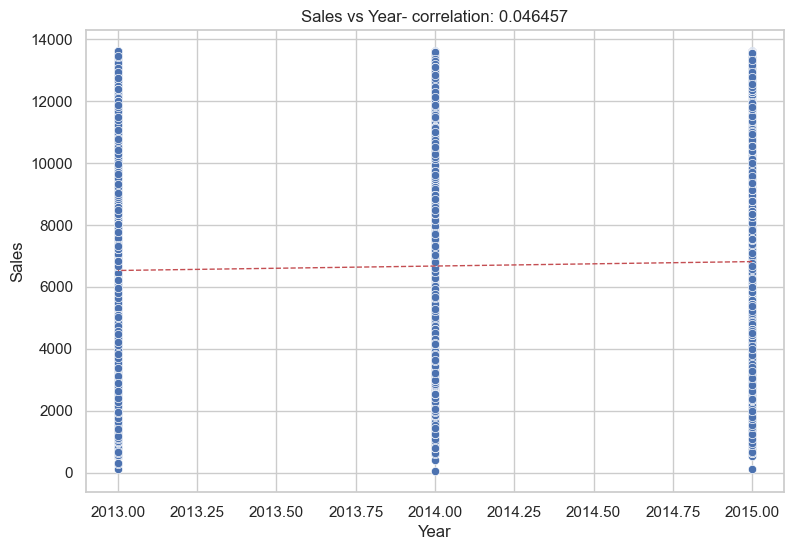

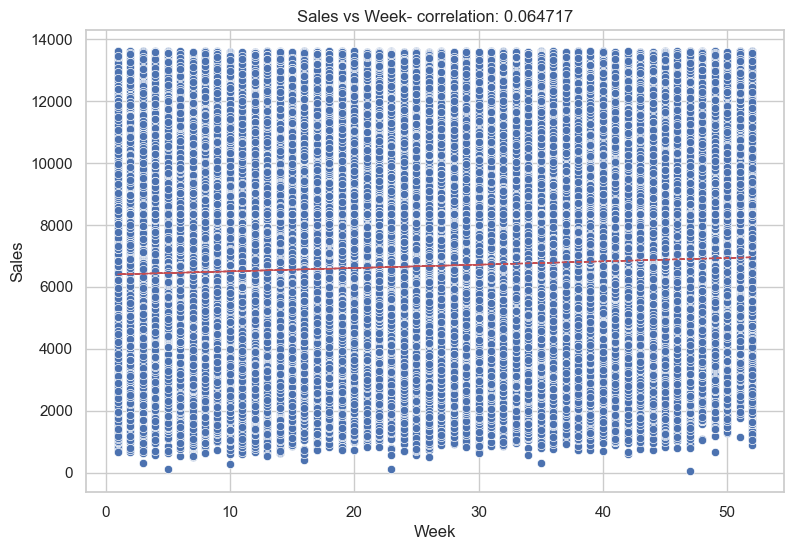

In [153]:
# Hãy xem mối quan hệ giữa doanh số (sales) và các đặc trưng khác”
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encode xong rồi mới tách ngày
df_new = pd.get_dummies(df, dtype=int, drop_first=True)

df_new["Day"]   = df_new["Date"].dt.day
df_new["Month"] = df_new["Date"].dt.month
df_new["Year"]  = df_new["Date"].dt.year
df_new["Week"]  = df_new["Date"].dt.isocalendar().week.astype(int)

# 2. Lấy các cột số để vẽ
cols = df_new.select_dtypes(include=[np.number]).columns.tolist()

# Đảm bảo 4 cột Day/Month/Year/Week có trong list (phòng trường hợp bị sót)
for extra in ["Day", "Month", "Year", "Week"]:
    if extra in df_new.columns and extra not in cols:
        cols.append(extra)

# (Tuỳ bạn: nếu không muốn vẽ Date_int hay gì đó, có thể bỏ bớt ở đây)
# Ví dụ: nếu có cột Date_int không muốn vẽ:
# cols = [c for c in cols if c != "Date_int"]

for col in cols:
    x = df_new[col].astype(float)
    y = df_new["Sales"].astype(float)

    # bỏ NaN nếu có
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]

    correlation = x.corr(y)

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    sns.scatterplot(x=x, y=y)
    plt.xlabel(col)
    plt.ylabel("Sales")
    ax.set_title(f"Sales vs {col}- correlation: {round(correlation, 6)}")

    # đường hồi quy
    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)
    plt.plot(x, y_hat, "r--", lw=1)

    plt.show()


<Axes: >

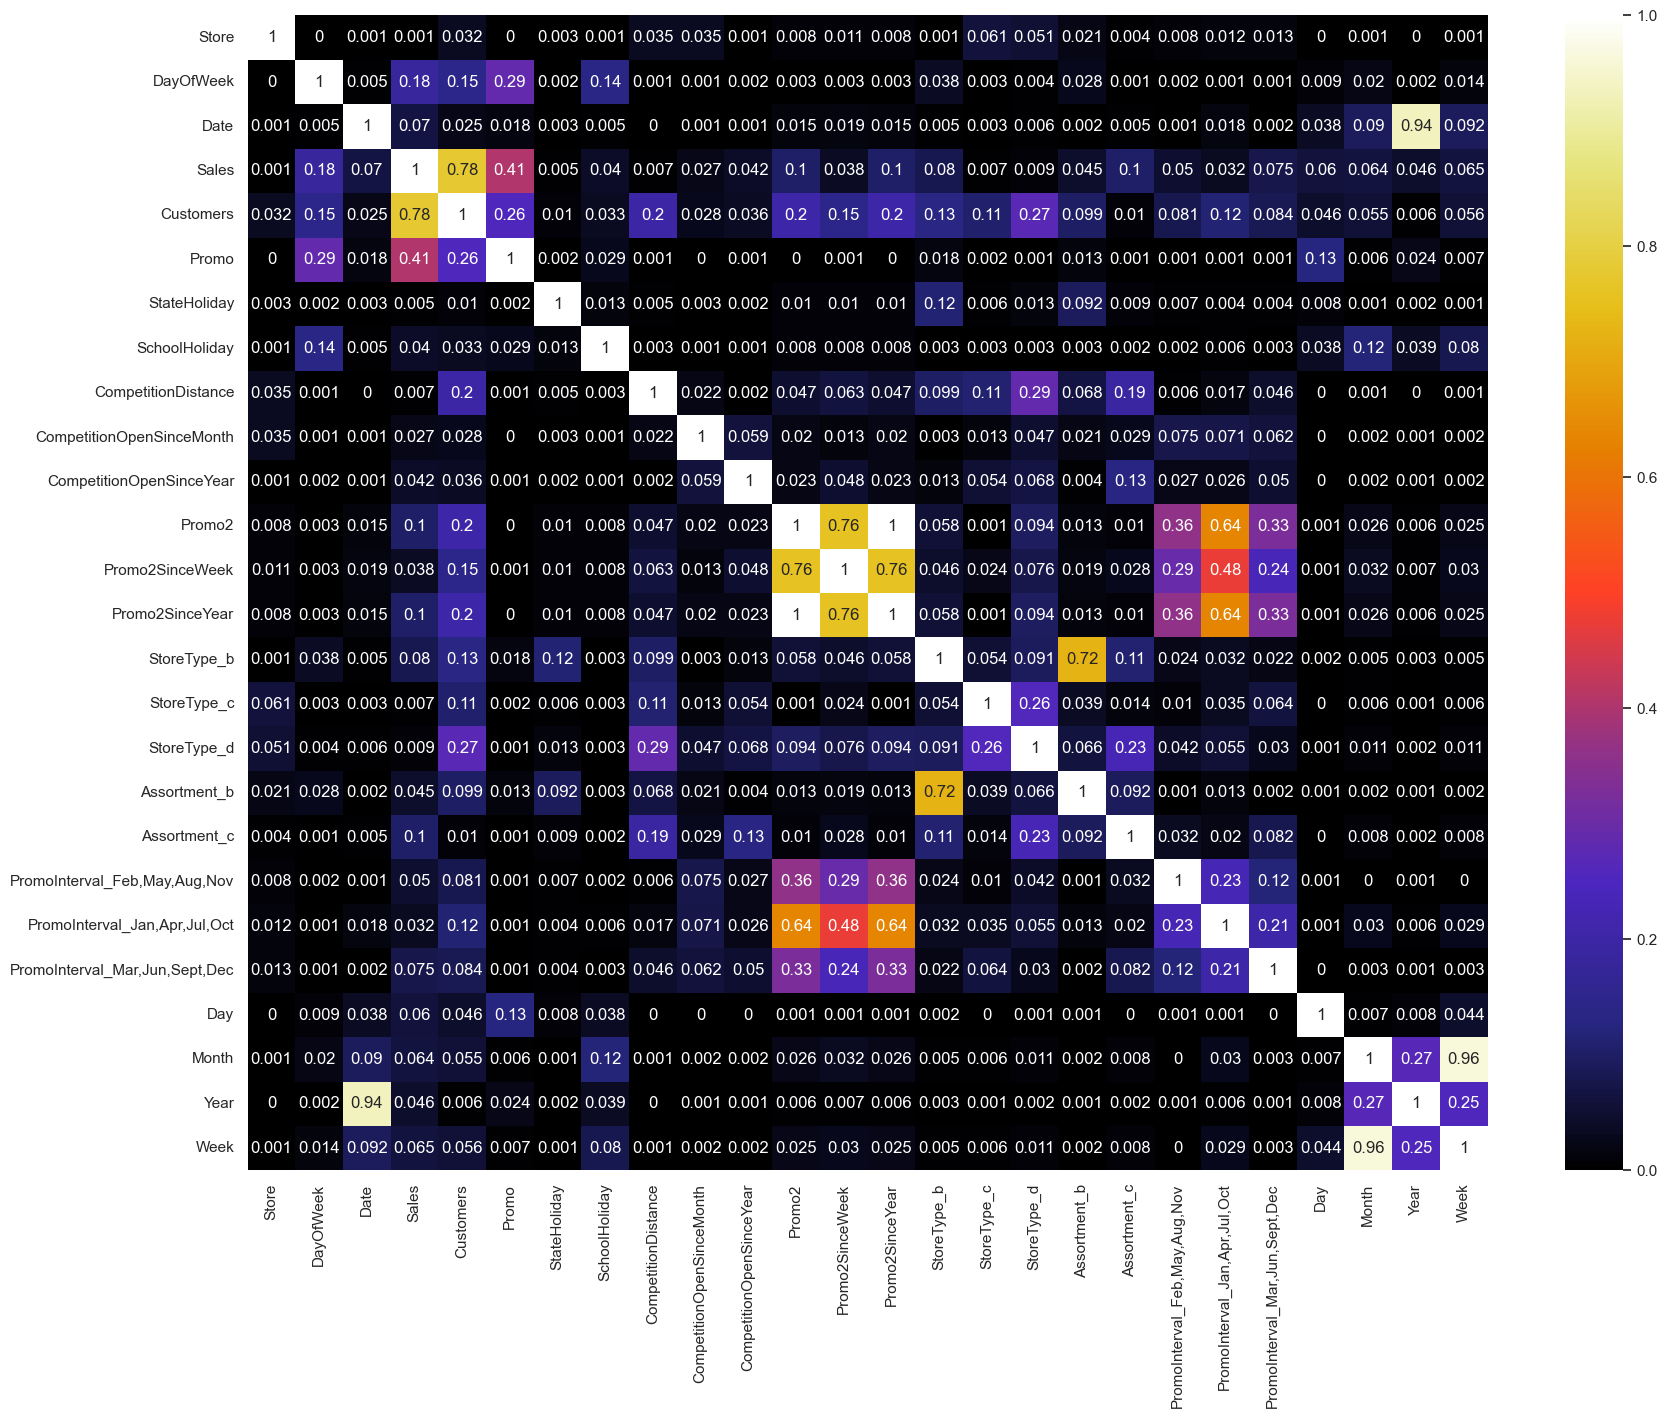

In [154]:
# Lựa chọn đặc trưng một cách hợp lý để tránh hiện tượng overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df_new.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

- Chúng ta chỉ nên đưa vào dataframe cuối cùng những đặc trưng có ảnh hưởng mạnh đến biến phụ thuộc, tức là Sales.
- Để làm điều này, chúng ta sử dụng kỹ thuật Variance Inflation Factor (VIF) nhằm xác định mức độ đa cộng tuyến (multicollinearity).

In [155]:
# Định nghĩa một hàm để tính variance_inflation_factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calc_vif(X: pd.DataFrame) -> pd.DataFrame:
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


- Tính toán VIF (Variance Inflation Factor) bằng cách loại trừ:
    + ‘Sales’ → vì đây là biến mục tiêu
    + ‘Store’ → vì đây chỉ là mã StoreID và không cung cấp thông tin hữu ích”**

In [156]:
df_new["CompetitionDuration"] = (
    (df_new["Year"] - df_new["CompetitionOpenSinceYear"]) * 12
    + (df_new["Month"] - df_new["CompetitionOpenSinceMonth"])
)

df_new["CompetitionDuration"] = (
    df_new["CompetitionDuration"]
        .map(lambda x: 0 if x < 0 else int(x))
        .fillna(0)
)

- Chúng tôi đã trích xuất các đặc trưng mới ‘CompetitionDuration’ và ‘PromoDuration’ từ các đặc trưng ‘Promo2SinceWeek’, ‘Promo2SinceYear’, ‘CompetitionOpenSinceMonth’, ‘CompetitionOpenSinceYear’, ‘Month’, ‘Year’, ‘Week’.
- Vì vậy, chúng ta có thể loại bỏ các đặc trưng gốc này khi tính toán VIF.”

In [157]:

# calculating the vif by excluding some features which are not giving any information

cols = [
    i
    for i in df_new.describe().columns
    if i not in [
        "Store",
        "Sales",
        "Promo2SinceWeek",
        "Promo2SinceYear",
        "CompetitionOpenSinceMonth",
        "CompetitionOpenSinceYear",
        "Month",        # SỬA LỖI Monthss → Month
        "Week",
        "Year",
        "PromoInterval_Jan,Apr,Jul,Oct",
        "Assortment_b",
        "PromoDuration",
    ]
]

# bỏ Date vì pandas mới đưa nó vào describe()
cols = [c for c in cols if c != "Date"]

vif_result = calc_vif(df_new[cols])
vif_result


variables       VIF
0                        DayOfWeek  4.217366
1                        Customers  6.326273
2                            Promo  2.072586
3                     StateHoliday  1.015180
4                    SchoolHoliday  1.247349
5              CompetitionDistance  2.180119
6                           Promo2  2.632409
7                      StoreType_b  1.081173
8                      StoreType_c  1.264460
9                      StoreType_d  1.775923
10                    Assortment_c  2.079802
11   PromoInterval_Feb,May,Aug,Nov  1.407067
12  PromoInterval_Mar,Jun,Sept,Dec  1.353285
13                             Day  3.781820
14             CompetitionDuration  1.836659

- Chúng ta đã thu được các giá trị VIF rất tốt (nhỏ hơn 10).
Bây giờ hãy tiếp tục và lưu các đặc trưng đã chọn vào một dataframe mới.”

In [158]:
# Dataframe mới — đây sẽ là dataframe cuối cùng của nhóm
final_df = df_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales"]]

In [159]:
# Kiểm tra thông tin của dataframe cuối cùng 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   DayOfWeek                       844338 non-null  int64
 1   Customers                       844338 non-null  int64
 2   Promo                           844338 non-null  int64
 3   StateHoliday                    844338 non-null  int64
 4   SchoolHoliday                   844338 non-null  int64
 5   CompetitionDistance             844338 non-null  int64
 6   Promo2                          844338 non-null  int64
 7   StoreType_b                     844338 non-null  int64
 8   StoreType_c                     844338 non-null  int64
 9   StoreType_d                     844338 non-null  int64
 10  Assortment_c                    844338 non-null  int64
 11  PromoInterval_Feb,May,Aug,Nov   844338 non-null  int64
 12  PromoInterval_Mar,Jun,Sept,Dec  844338 non-null 

- Nhóm  đã sử dụng những phương pháp lựa chọn đặc trưng nào và tại sao?

- Nhóm đã vẽ scatterplot của seaborn và heatmap của seaborn để xem mối quan hệ giữa từng đặc trưng với biến mục tiêu, và quan sát được các mức độ tương quan sau:
    + Tương quan dương (Positive Correlation) – Customers, Open, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.
    + Tương quan âm (Negative Correlation) – DayOfWeek, StateHoliday, CompetitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek, Promo2SinceYear, ‘PromoInterval_Feb,May,Aug,Nov’, ‘PromoInterval_Jan,Apr,Jul,Oct’, ‘PromoInterval_Mar,Jun,Sept,Dec’, Day, CompetitionDuration.
    + Không tương quan (No Correlation) – Store, StoreType_c, StoreType_d.

- Nhóm đã sử dụng phương pháp Filter (Filter Method) thông qua correlation heatmap và VIF (Variance Inflation Factor) để loại bỏ một số đặc trưng gây nhiễu trong quá trình triển khai mô hình. Đồng thời, chúng tôi đã loại bỏ hiện tượng đa cộng tuyến và lựa chọn những đặc trưng có mức độ phụ thuộc cao vào biến mục tiêu.

- Các đặc trưng được xem là quan trọng và lí do 

- Nhóm đã chọn các đặc trưng ‘DayOfWeek’, ‘Customers’, ‘Promo’, ‘StateHoliday’, ‘SchoolHoliday’, ‘CompetitionDistance’, ‘Promo2’, ‘StoreType_b’, ‘StoreType_c’, ‘StoreType_d’, ‘Assortment_c’, ‘PromoInterval_Feb,May,Aug,Nov’, ‘PromoInterval_Mar,Jun,Sept,Dec’, ‘Day’, ‘CompetitionDuration’ làm các đặc trưng cuối cùng vì chúng có mức độ tương quan cao với biến mục tiêu (Sales) và không có hai đặc trưng nào cung cấp cùng một loại thông tin.”


# 5. CHUYỂN ĐỔI DỮ LIỆU

- Bạn có nghĩ rằng dữ liệu của bạn cần được chuyển đổi không? Nếu có, bạn đã sử dụng loại chuyển đổi nào? Giải thích lý do.”

In [160]:
# kiểm tra xem biến nào mang tính chất liên tục (continuous)
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature DayOfWeek is: 7
The number of unique counts in feature Customers is: 1390
The number of unique counts in feature Promo is: 2
The number of unique counts in feature StateHoliday is: 2
The number of unique counts in feature SchoolHoliday is: 2
The number of unique counts in feature CompetitionDistance is: 555
The number of unique counts in feature Promo2 is: 2
The number of unique counts in feature StoreType_b is: 2
The number of unique counts in feature StoreType_c is: 2
The number of unique counts in feature StoreType_d is: 2
The number of unique counts in feature Assortment_c is: 2
The number of unique counts in feature PromoInterval_Feb,May,Aug,Nov is: 2
The number of unique counts in feature PromoInterval_Mar,Jun,Sept,Dec is: 2
The number of unique counts in feature Day is: 31
The number of unique counts in feature CompetitionDuration is: 173
The number of unique counts in feature Sales is: 12755


In [161]:
#Lưu các biến liên tục (có số lượng giá trị duy nhất > 40) vào một danh sách riêng và xử lý chúng để đưa phân phối về dạng phân phối chuẩn (Gaussian distribution)”
cont_variables= ["Sales", "Customers", "CompetitionDistance", "CompetitionDuration"]

Before Applying Transformation


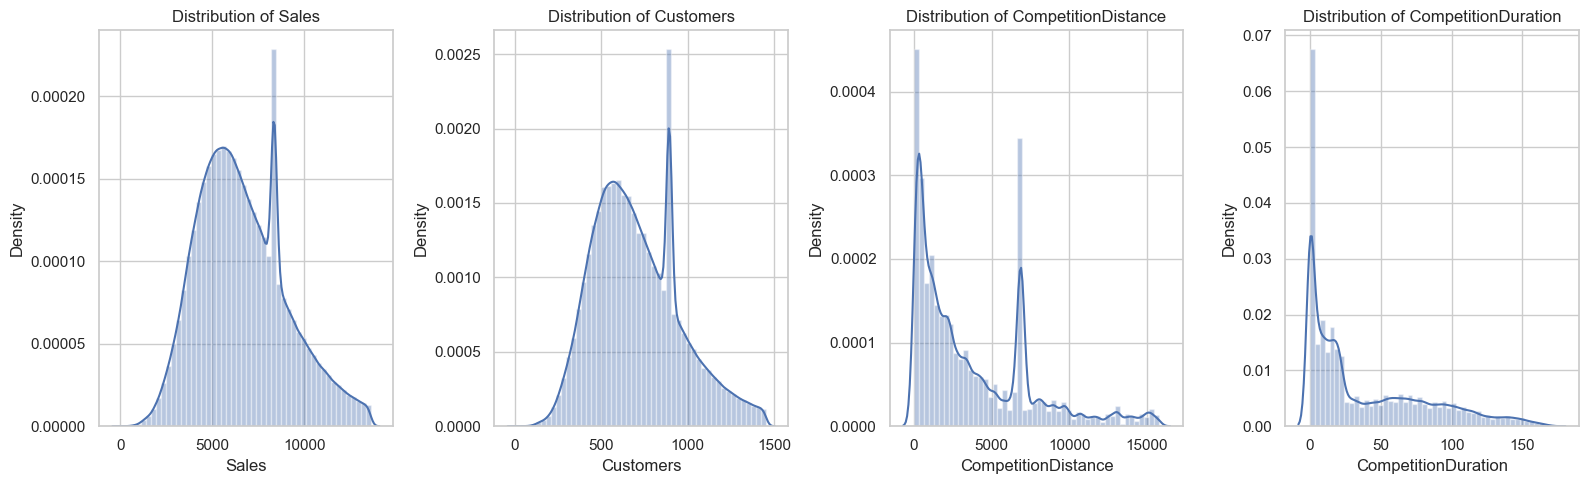

In [162]:
# Kiểm tra phân phối của từng biến liên tục trong dataframe cuối cùng 
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

- Từ các biểu đồ phân phối ở trên, có thể thấy rằng các biến này không tuân theo phân phối chuẩn một cách hoàn hảo. Vì vậy, chúng ta sẽ áp dụng một số kỹ thuật chuyển đổi dữ liệu nhằm đưa chúng gần với phân phối chuẩn hơn, vì đây là một giả định quan trọng đối với các mô hình tuyến tính như Linear Regression.

In [163]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


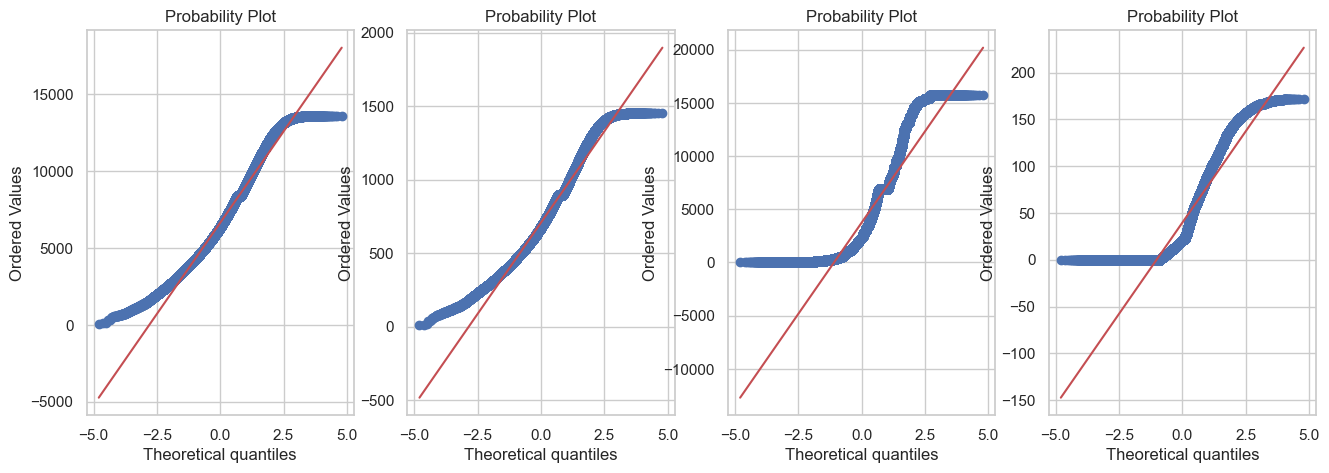

In [164]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

-  Như thể hiện ở các biểu đồ trên, các biến số liên tục của chúng ta không tuân theo phân phối chuẩn một cách hoàn hảo. Vì vậy, chúng ta sẽ thử áp dụng nhiều kỹ thuật chuyển đổi khác nhau để đưa các biến này về dạng phân phối chuẩn (Gaussian).”

- Tạo các bản sao khác nhau và kiểm tra xem kiểu chuyển đổi nào là tốt nhất cho từng đặc trưng.

In [165]:

test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
test_df5=final_df.copy()

# “Chuyển đổi logarit (Logarithmic Transformation)”

After Applying Transformation


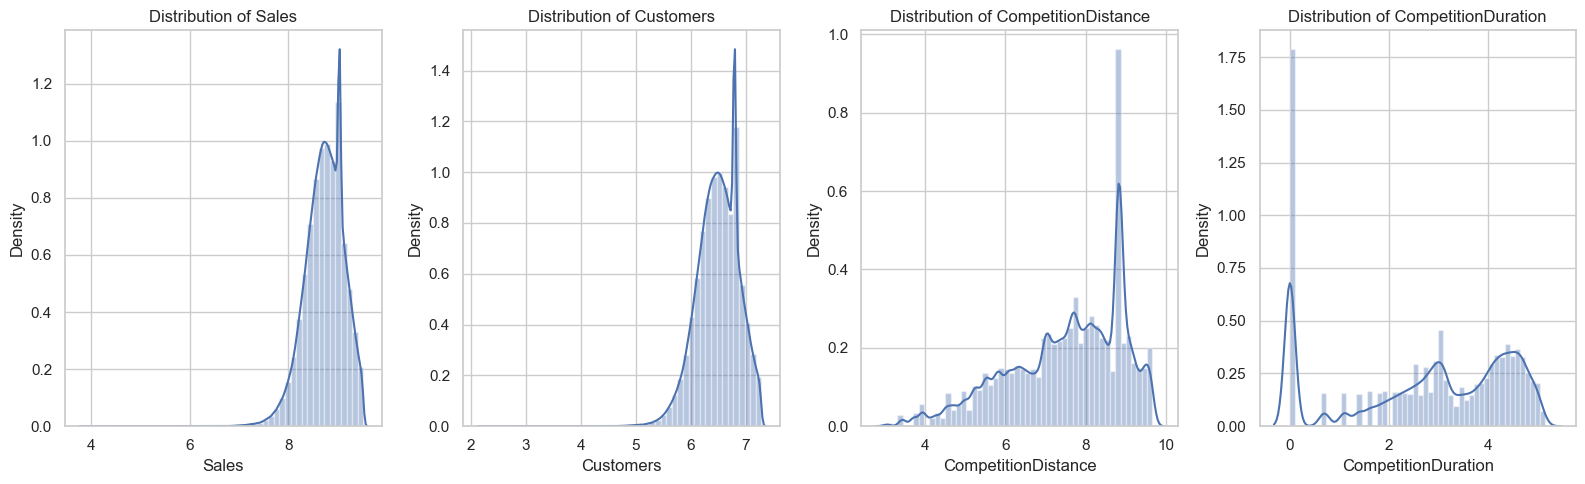

In [166]:
# Áp dụng các kỹ thuật chuyển đổi lên các cột đã được chọn ở trên
test_df1['Sales']=np.log(test_df1['Sales']+1)
test_df1['Customers']=np.log(test_df1['Customers']+1)
test_df1['CompetitionDistance']=np.log(test_df1['CompetitionDistance']+1)
test_df1['CompetitionDuration']=np.log(test_df1['CompetitionDuration']+1)

# Kiểm tra phân phối của từng biến liên tục sau khi loại bỏ giá trị 0 khỏi dataframe cuối cùng của chúng ta”
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


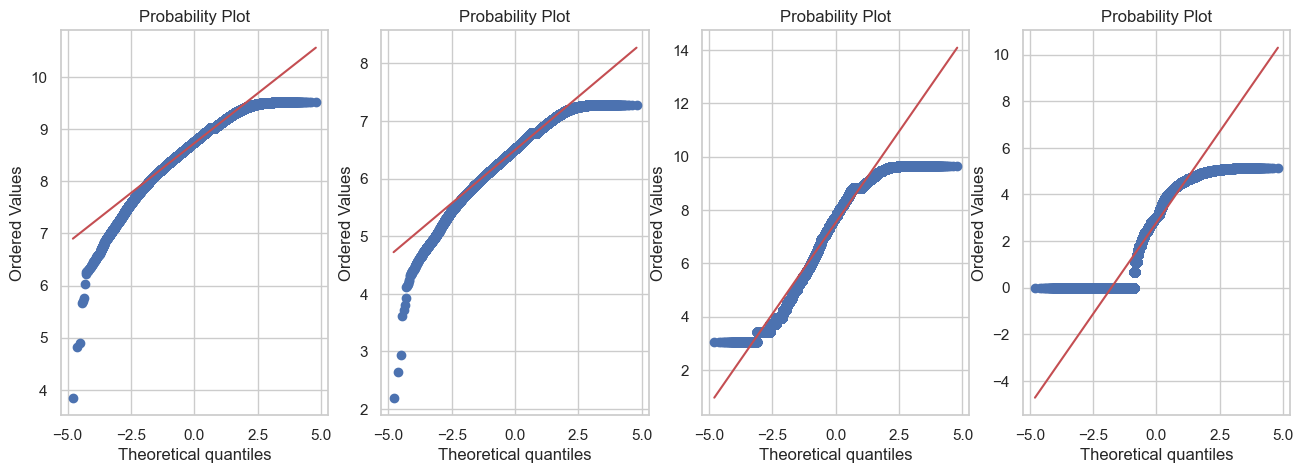

In [167]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

# Chuyển đổi nghịch đảo (Reciprocal Transformation)

After Applying Transformation


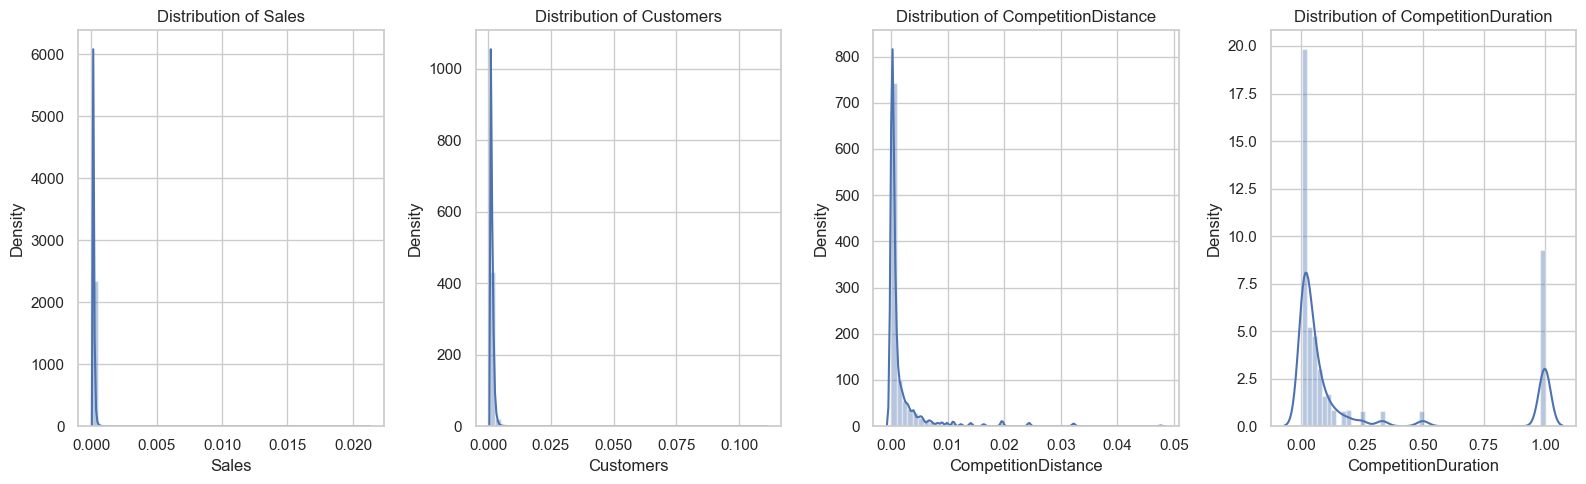

In [168]:

test_df2['Sales']=1/(test_df2['Sales']+1)
test_df2['Customers']=1/(test_df2['Customers']+1)
test_df2['CompetitionDistance']=1/(test_df2['CompetitionDistance']+1)
test_df2['CompetitionDuration']=1/(test_df2['CompetitionDuration']+1)

plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


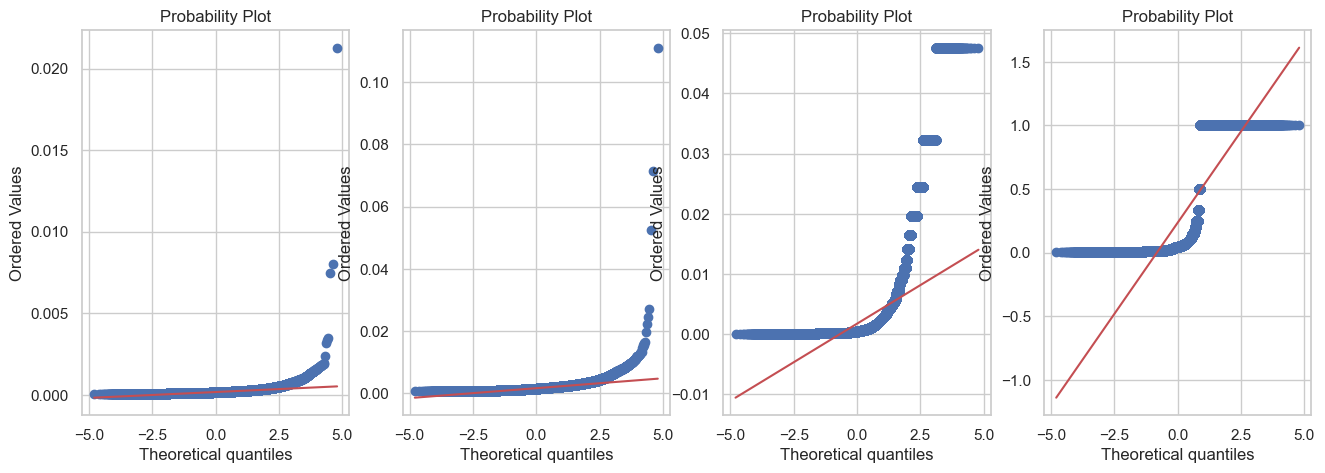

In [169]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

# Chuyển đổi căn bậc hai (Square Root Transformation)”

After Applying Transformation


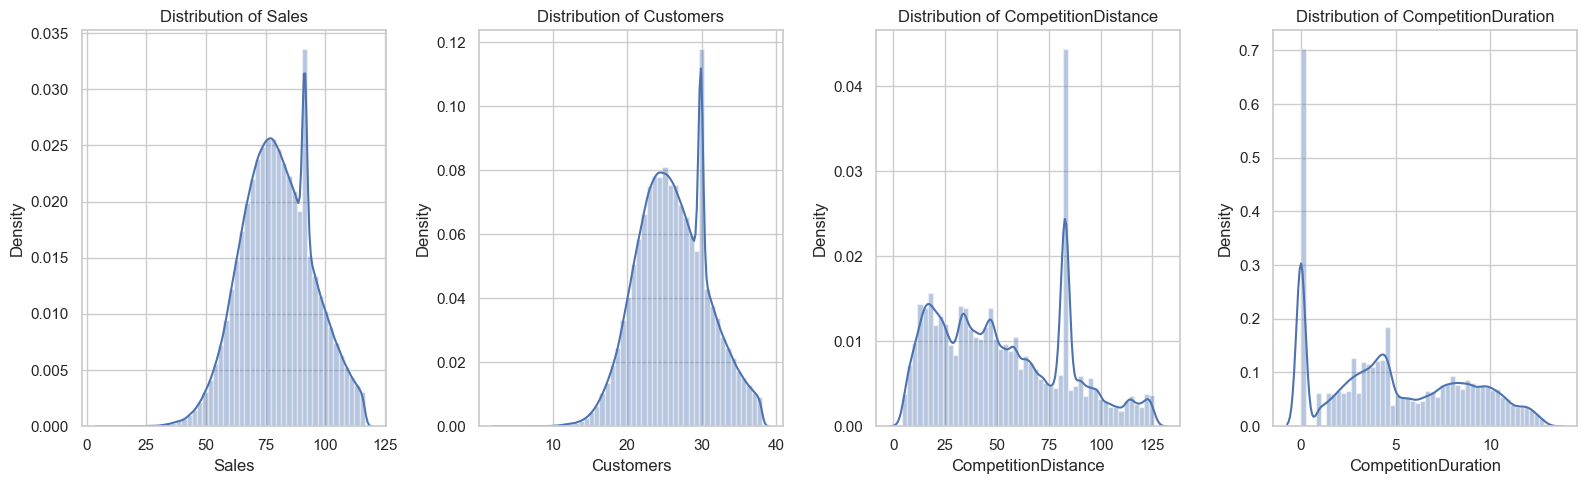

In [170]:
# Applying transformation on the above considered columns
test_df3['Sales']=(test_df3['Sales'])**(1/2)
test_df3['Customers']=(test_df3['Customers'])**(1/2)
test_df3['CompetitionDistance']=(test_df3['CompetitionDistance'])**(1/2)
test_df3['CompetitionDuration']=(test_df3['CompetitionDuration'])**(1/2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


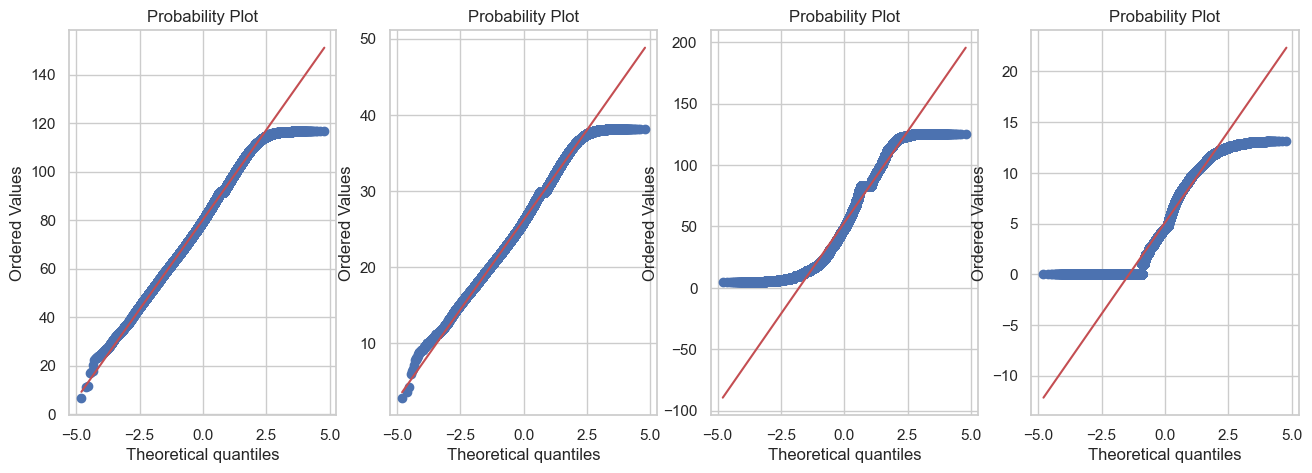

In [171]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

# “Chuyển đổi hàm mũ (Exponential Transformation)”

After Applying Transformation


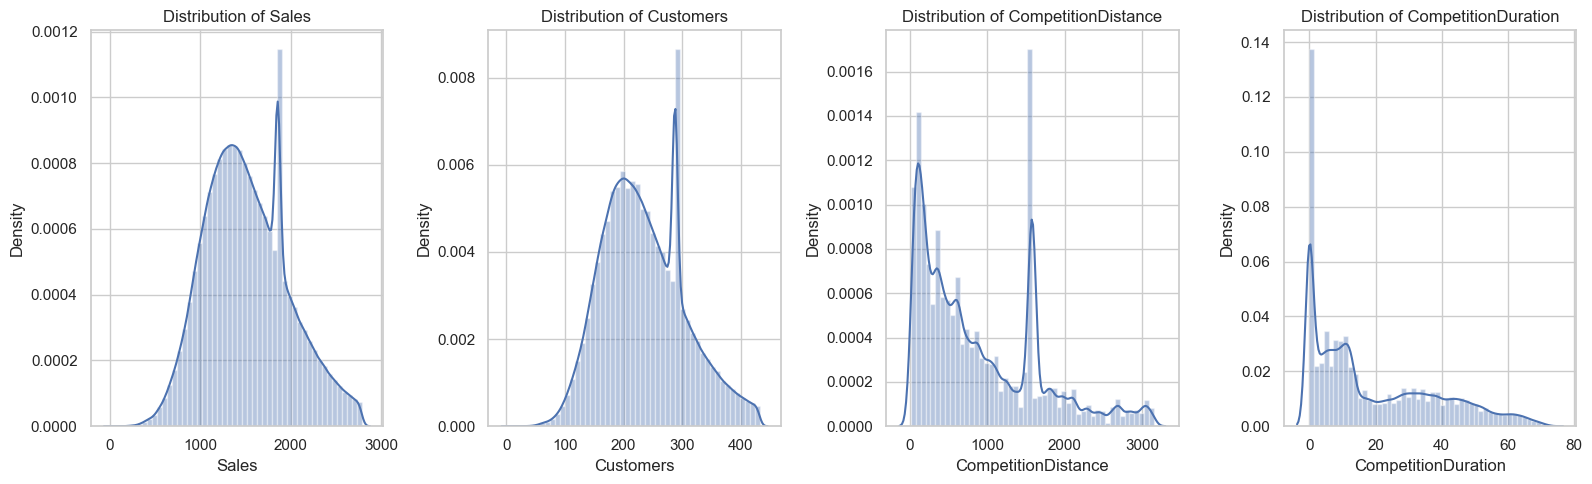

In [172]:
# Applying transformation on the above considered columns
test_df4['Sales']=(test_df4['Sales'])**(1/1.2)
test_df4['Customers']=(test_df4['Customers'])**(1/1.2)
test_df4['CompetitionDistance']=(test_df4['CompetitionDistance'])**(1/1.2)
test_df4['CompetitionDuration']=(test_df4['CompetitionDuration'])**(1/1.2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


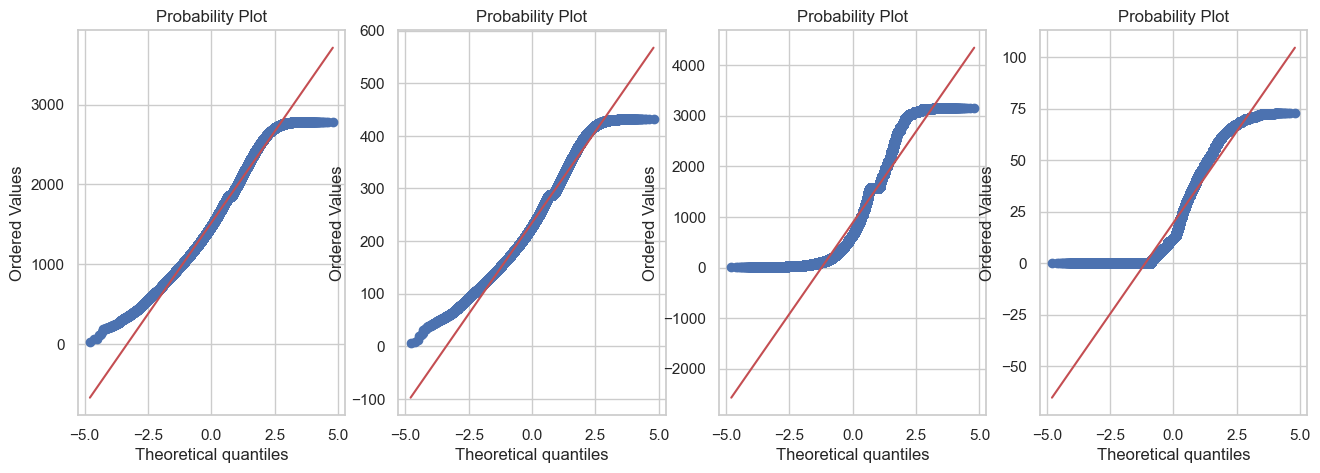

In [173]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)
plt.show()

- Từ các biểu đồ trên, có thể thấy rằng:
    + Biến ‘Sales’ cần áp dụng chuyển đổi căn bậc hai (square root transformation)
    + Biến ‘Customers’ cần áp dụng chuyển đổi căn bậc hai
    + Biến ‘CompetitionDistance’ cần áp dụng chuyển đổi căn bậc hai
    + Biến ‘CompetitionDuration’ không cần áp dụng chuyển đổi nào”

In [174]:
# Áp dụng chuyển đổi lên các cột đã chọn ở trên 
# Chuyển đổi căn bậc hai (Square Root Transformation)”
final_df['Sales']=(final_df['Sales'])**(1/2)
final_df['Customers']=(final_df['Customers'])**(1/2)
final_df['CompetitionDistance']=(final_df['CompetitionDistance'])**(1/2)

# 6. CHIA TỶ LỆ DỮ LIỆU

In [175]:
# Tách biến "x" và "y"
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

(844338, 15)
(844338, 1)


In [176]:
# Chuẩn hóa dữ liệu 
# Import thư viện StandardScaler
from sklearn.preprocessing import StandardScaler

In [177]:
# Tạo object
std_regressor= StandardScaler()

In [178]:
# Fit and Transform
x= std_regressor.fit_transform(x)

- Phương pháp sử dụng để chuẩn hóa dữ liệu 
- Nhóm đã sử dụng StandardScaler trong thư viện sklearn để chuẩn hóa dữ liệu. Điều này rất quan trọng vì các đặc trưng có thang đo khác nhau có thể gây ra hiệu suất kém hoặc làm chậm tốc độ hội tụ của mô hình. Việc chuẩn hóa các đặc trưng cũng giúp chúng ta dễ dàng so sánh giữa các đặc trưng hoặc quan sát tác động của một đặc trưng lên biến mục tiêu (‘Sales’) thông qua độ lớn của hệ số hồi quy.

- Ngoài ra, nhóm chuẩn bị áp dụng mô hình hồi quy tuyến tính, mà trong đó phân phối chuẩn của dữ liệu là một giả định thống kê quan trọng — và việc chuẩn hóa giúp đáp ứng giả định này.

# 7. Giảm chiều dữ liệu (Dimensionality Reduction)

# 8.Phân chia dữ liệu (data splitting)

In [179]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra. Hãy chọn tỷ lệ chia một cách hợp lý.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [180]:
# Phân chia dữ liệu
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [181]:
# Kiểm tra kích thước (shape) sau khi chia dữ liệu”
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

- Sử dụng tỷ lệ chia dữ liệu 
- Vì bộ dữ liệu của chúng tôi rất lớn, gần 1 triệu quan sát, nên chúng tôi đã chia 80% dữ liệu cho tập huấn luyện và 20% cho tập kiểm tra, với random_state = 0 để đảm bảo rằng chúng tôi không nhận được các quan sát khác nhau mỗi khi thực hiện việc chia dữ liệu.”

In [183]:
final_df.to_csv("processed_data.csv", index=False)